# Final Project - Predicting Movie Genres!

![Movie genre header](genre_header.jpg)

Welcome to the final project of CS109b. 

The overall theme of the final project is movie data with a focus on movie genre prediction, because it is an area where we all are more or less application domain experts. First, you will explore your data and the challenges of the problem by exploratory data analysis. Use visualizations to find features that correlate with movie genres. These can be extracted from the movie posters, or meta data, or other data you gather, for example plot summaries or even movie transcripts. You will then compare traditional statistical or machine learning methods like generalized additive models, random forest, Bayesian prediction methods, boosting, and SVM, to deep learning models for movie genre prediction. 

For this project you will work in teams of 3-4 people and there are weekly milestones to guide you along the way. Even though the milestones are graded, they are mainly in place to make sure you stay in contact with your TF and make progress with the project. Throughout the project you also have room for creativity and to pursue your own ideas. While you need to hand in the milestones at the appropriate due date, there is nothing preventing you from working on a later milestone ahead of time. We suggest that you read through the whole project and all milestones in the beginning to be able to plan ahead. The project is pretty open ended, so you can be creative and let your data science knowledge shine! 

For each milestone you will submit a notebook, in raw (`.ipynb`) and PDF formats, containing the deliverables of that week and the extra work you did so far. The notebooks need to contain your code, comments, explanations, thoughts, and visualizations. The final deliverables are a two-minute screencast, a report in paper style for a general data science audience, and all your data and code that you developed throughout the project. 

Below is a description of the data and the milestones with their due dates. All work is due by 11:59PM on the due date unless otherwise specified. We expect you to have the mandatory parts finished by the milestone due dates, and there will be no extensions. However, we strongly encourage you to plan ahead. For example, you need to think about the classification task early on to plan how you want to assemble your training data, and it is beneficial to start the deep learning work as early as possible. There is nothing hindering you to already train a model in the EDA phase to get a better feel for what challenges might lay ahead with the data. You should also see the milestone requirements as a basis for your own creativity, and we expect that most of you will go beyond the mandatory deliverables. For example, if you have a great idea about an interesting question that has to do with movie genre, but cannot be answered with the data from TMDb or IMDb, feel free to gather more data from somewhere else. 

We provide a data interface in Python, because it is convenient for IMDb, and we will use Python for the deep learning part. Specifically we will use Keras, a deep learning library that provides a high level interface to Google's Tensorflow framework for deep learning. However, if you feel that you prefer to do some of the work, e.g., visualizations or data cleanup, in R then feel free to use it. You can also use Spark to preprocess your data, especially if you collect large amounts of it from other sources. 

*Important:* Your grade for a milestone will depend on the required deliverables you submit at the due date for that milestone. But every milestone, especially the final project submission, can contain additional cool work you did that goes beyond the deliverables spelled out below. 


### Logistics 

Please adhere to the following guidelines for all submissions:
- one submission per team
- notebooks should be submitted as PDF and as raw (`.ipynb`) version
- all notebooks should be executed so they contain relevant visualizations, and other results
- try to make it as easy as possible for the TFs to get all relevant information about your work
- do not submit big data sets, please provide a readme file with a link instead
- the final report should also be submitted as pdf

### Movie Data:

The project is based on two different sources of movie data: [IMDb](http://www.imdb.com/) and [TMDb](https://www.themoviedb.org/). TMDb is great, because it provides the movie posters in addition to the metadata. This is crucial for the deep learning part, in which you will try to predict movie genres from posters. IMDb has more metadata available and will supplement the TMDb data you have. 

TMDb provides an easy to use [API](https://www.themoviedb.org/documentation/api) that allows you to download the data selectively. IMDb does not provide an API, but there is a Python interface available to access the metadata. We will use [IMDbPY](http://imdbpy.sourceforge.net/), which is already installed on the AMI and virtual box images for your convenience.

*Important*: Please remember to limit your data rate when obtaining the data. Play nicely and do not just spam servers as fast as you can. This will prevent your IP from getting banned. The easiest way to do is is to use the [sleep](http://stackoverflow.com/questions/510348/how-can-i-make-a-time-delay-in-python) function in Python.


### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spend on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genera classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help building features from the metadata for prediction. Is the length of a movie title correlated with genre?


## Milestone 1 Submission

### CS109b Project - Group 37 (Alexander Dubitskiy, Keenan Venuti, Timur Zambalayev)

First let's do some initial exploration of the the TMDb and IMDb data.

### API code to access the genre and movie poster path of your favorite movie

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import tmdbsimple as tmdb
from imdb import IMDb

In [2]:
tmdb.API_KEY = 'a995a7fe53e021d77d82b99428850ff1'

In [3]:
conf = tmdb.Configuration()
c_info = conf.info()

Now let's look at the list of the poster sizes from TMDb.

In [4]:
img_conf = c_info['images']
img_conf['poster_sizes']

[u'w92', u'w154', u'w185', u'w342', u'w500', u'w780', u'original']

What genres do we have in TMDb? How many?

In [5]:
genres = tmdb.Genres().list()
tmdb_genres = [g['name'] for g in genres['genres'] ]
print(len(tmdb_genres))
print(tmdb_genres)

19
[u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Family', u'Fantasy', u'History', u'Horror', u'Music', u'Mystery', u'Romance', u'Science Fiction', u'TV Movie', u'Thriller', u'War', u'Western']


Here's the list of the genres from IMDb (copied from the site).
So it's 19 genres in TMDb vs 27 for IMDb.

In [8]:
imdb_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Game','Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Sitcom','Sport','Talk-Show','Thriller','War','Western']
print(len(imdb_genres))
print(imdb_genres)

27
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game', 'Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sitcom', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


Our favorite movie will be "Ghost in the Shell".
Let's search for it.

In [9]:
search = tmdb.Search()
response = search.movie(query="ghost in the shell")
for s in search.results:
    print(s['title'], s['id'], s['release_date'], s['popularity'])                        

(u'Ghost in the Shell', 315837, u'2017-03-29', 53.86811)
(u'Ghost in the Shell', 9323, u'1995-11-18', 6.135032)
(u'Ghost in the Shell 2.0', 14092, u'2008-07-12', 2.703536)
(u'Ghost in the Shell 2: Innocence', 12140, u'2004-03-06', 2.601958)
(u'Ghost in the Shell Arise - Border 5: Pyrophoric Cult', 381519, u'2015-08-26', 2.262368)
(u'Ghost in the Shell: The New Movie', 334376, u'2015-06-20', 2.265999)
(u'Ghost in the Shell: Stand Alone Complex - Solid State Society', 18874, u'2007-02-23', 1.960349)
(u'Ghost in the Shell: Stand Alone Complex - The Laughing Man', 18839, u'2005-01-01', 1.395512)
(u'Ghost In The Shell: The Movie Virtual Reality Diver', 384217, u'2016-02-02', 1.13345)
(u'Ghost in the Shell Arise - Border 1: Ghost Pain', 196750, u'2013-06-22', 1.466764)
(u'Pandora in the Crimson Shell: Ghost Urn', 377885, u'2015-12-05', 1.024687)
(u'Ghost in the Shell Arise - Border 2: Ghost Whispers', 212168, u'2013-11-29', 1.418832)
(u'Ghost in the Shell Arise - Border 3: Ghost Tears', 2403

In [10]:
tmdb_movie_id = 315837
tmdb_movie = tmdb.Movies(tmdb_movie_id)
info = tmdb_movie.info()
info['title']

u'Ghost in the Shell'

Its genres from TMDB:

In [11]:
for tmdb_genre in info['genres']:
    print tmdb_genre['name']

Action
Drama
Science Fiction


The movie poster image from TMDB:

In [15]:
Image(url= img_conf['base_url'] + img_conf['poster_sizes'][1] + tmdb_movie.poster_path)

### Genre for this movie listed by TMDb and IMDb

So we found TMDb genres (Action, Drama, Science Fiction) and the poster for our favorite movie.


In [16]:
imdb_service = IMDb()
imdb_movie_id = info['imdb_id'][2:]
imdb_movie = imdb_service.get_movie(imdb_movie_id)

The movie genres from IMDB

In [19]:
for imdb_genres in imdb_movie.data['genres']:
    print imdb_genres

Action
Crime
Drama
Mystery
Sci-Fi
Thriller


### A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API

IMDB has a comprehensive list of genres, we use IMDB as the main source

In [18]:
def imdbGenres(imdb_movie):
    return imdb_movie.data['genres']

def tmdbGenres(tmdb_movie):
    tmdb_movie_genres = [g['name'] for g in tmdb_movie['genres']]
    tmdb_movie_genres = [g.replace('Science Fiction', 'Sci-Fi') for g in tmdb_movie_genres]
    return tmdb_movie_genres

def combinedGenres(imdb_movie, tmdb_movie):
    return list(set(imdbGenres(imdb_movie)) | set(tmdbGenres(tmdb_movie)))

In [43]:
discover = tmdb.Discover()
disc_result_2016 = discover.movie(query = 'primary_release_year=2016&sort_by=popularity.desc')

A list of the 10 most popular movies of 2016 from TMDb.

We can see differences in IMDB and TMDB genres. If we look at "Beauty and the Beast" we would probably agree more with TMDb genres (Fantasy, Music and Romance) than IMDB (Sci-Fi (?), Crime (?)).

In [47]:
top_movies_2016 = disc_result_2016['results']
for top_movie in top_movies_2016[:10]:
    tmdb_movie = tmdb.Movies(top_movie['id']).info()
    imdb_movie = imdb_service.get_movie(info['imdb_id'][2:])
    print top_movie['id'], top_movie['title']
    print 'combined: ', combinedGenres(imdb_movie, tmdb_movie)
    print 'imdb: ', imdbGenres(imdb_movie)
    print 'tmdb: ', tmdbGenres(tmdb_movie)
    print '--------------'

321612 Beauty and the Beast
combined:  [u'Mystery', u'Drama', u'Music', u'Sci-Fi', u'Fantasy', u'Action', u'Romance', u'Thriller', u'Crime']
imdb:  [u'Action', u'Crime', u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
tmdb:  [u'Fantasy', u'Music', u'Romance']
--------------
263115 Logan
combined:  [u'Mystery', u'Drama', u'Sci-Fi', u'Action', u'Thriller', u'Crime']
imdb:  [u'Action', u'Crime', u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
tmdb:  [u'Action', u'Drama', u'Sci-Fi']
--------------
335797 Sing
combined:  [u'Mystery', u'Sci-Fi', u'Family', u'Crime', u'Drama', u'Animation', u'Music', u'Action', u'Comedy', u'Thriller']
imdb:  [u'Action', u'Crime', u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
tmdb:  [u'Animation', u'Comedy', u'Drama', u'Family', u'Music']
--------------
293167 Kong: Skull Island
combined:  [u'Mystery', u'Drama', u'Sci-Fi', u'Fantasy', u'Action', u'Adventure', u'Thriller', u'Crime']
imdb:  [u'Action', u'Crime', u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
tmdb:  [

### Movie genre dataset for exploration

In order to do some of the initial exploration we created movie genre dataset.
We used TMDb API to download data for top 11.3k movies.
We are building a local IMDB database and we intend to use actors/directors for the further work.

In [101]:
import time


start_time = time.time()

tmdb.API_KEY = 'a995a7fe53e021d77d82b99428850ff1'

discover = tmdb.Discover()

start_page = 1
num_pages = 2 # 1000

for page in xrange(start_page, num_pages + 1):
    if page != start_page:
        time.sleep(7)

    elapsed_mins = (time.time() - start_time) / 60.0

    print 'page: %d, elapsed mins: %.2f' % (page, elapsed_mins)
    discover_result = discover.movie(page=page, sort_by='popularity.desc')

    movies = discover_result['results']

    row_list = []
    for movie in movies:
        movie_id = movie['id']
        print movie_id, movie['title']
        try:
            tmdb_movie = tmdb.Movies(movie_id).info()
            row_list.append(tmdb_movie)
        except HTTPError as e:
            print str(e)

    df = pd.DataFrame(row_list)

    with open('tmdb_movies.csv', 'a') as csv_file:
        df.to_csv(csv_file, header=False, index=False, encoding='utf-8')


page: 1, elapsed mins: 0.00
321612 Beauty and the Beast
263115 Logan
335797 Sing
293167 Kong: Skull Island
315837 Ghost in the Shell
135397 Jurassic World
259316 Fantastic Beasts and Where to Find Them
295693 The Boss Baby
157336 Interstellar
381288 Split
127380 Finding Dory
76341 Mad Max: Fury Road
395992 Life
118340 Guardians of the Galaxy
293660 Deadpool
330459 Rogue One: A Star Wars Story
284052 Doctor Strange
329865 Arrival
271110 Captain America: Civil War
245891 John Wick
page: 2, elapsed mins: 0.16
346672 Underworld: Blood Wars
305470 Power Rangers
334543 Lion
15206 The Mother of Tears
22 Pirates of the Caribbean: The Curse of the Black Pearl
140607 Star Wars: The Force Awakens
228150 Fury
122917 The Hobbit: The Battle of the Five Armies
269149 Zootopia
381284 Hidden Figures
324786 Hacksaw Ridge
356305 Why Him?
131631 The Hunger Games: Mockingjay - Part 1
274870 Passengers
246655 X-Men: Apocalypse
121856 Assassin's Creed
278 The Shawshank Redemption
177572 Big Hero 6
24428 The 

The first page (top 20 popular movies) is what you can see at this url:
https://www.themoviedb.org/movie

We loaded first 11291 movies, then we encountered various problems with the data (movies with no data, repeated instances of the same movies, encoding issues).
The load took more than 2 hours. We also had to throttle the load (note using sleep function for 7 seconds). It's because TMDb was limiting the number of requests. We believe it's 40 requests per 10 seconds.

### Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

One problem that we see with predicting movie genres is that in most cases there are multiple different genres attached to each movie.

1) One way to solve this is we can consider one genre at any given moment. For example, we can try to predict for all the movies  in the dataset whether they belong to Action genre (yes or no, 1 or 0). We can apply a Logistic regression (for example) and evaluate the accuracy.

2) Another possible approach is to consider all possible genre combinations that we see in the dataset. For example, Action + Fantasy + Adventure. We can treat each unique combination as an indidual separate class. One possible problem with this approach is that we could have a lot of unique genre combinations. A variation of this approach could be considering only pairs or tuples of three of genres.

### Code to generate the movie genre pairs and a suitable visualization of the result

#### Let's look at the number of genres per movie.

total number of movies: 11291
unique values of number of genres per movie: set([0, 1, 2, 3, 4, 5, 6, 7])
mean number of genres per movie: 2.447


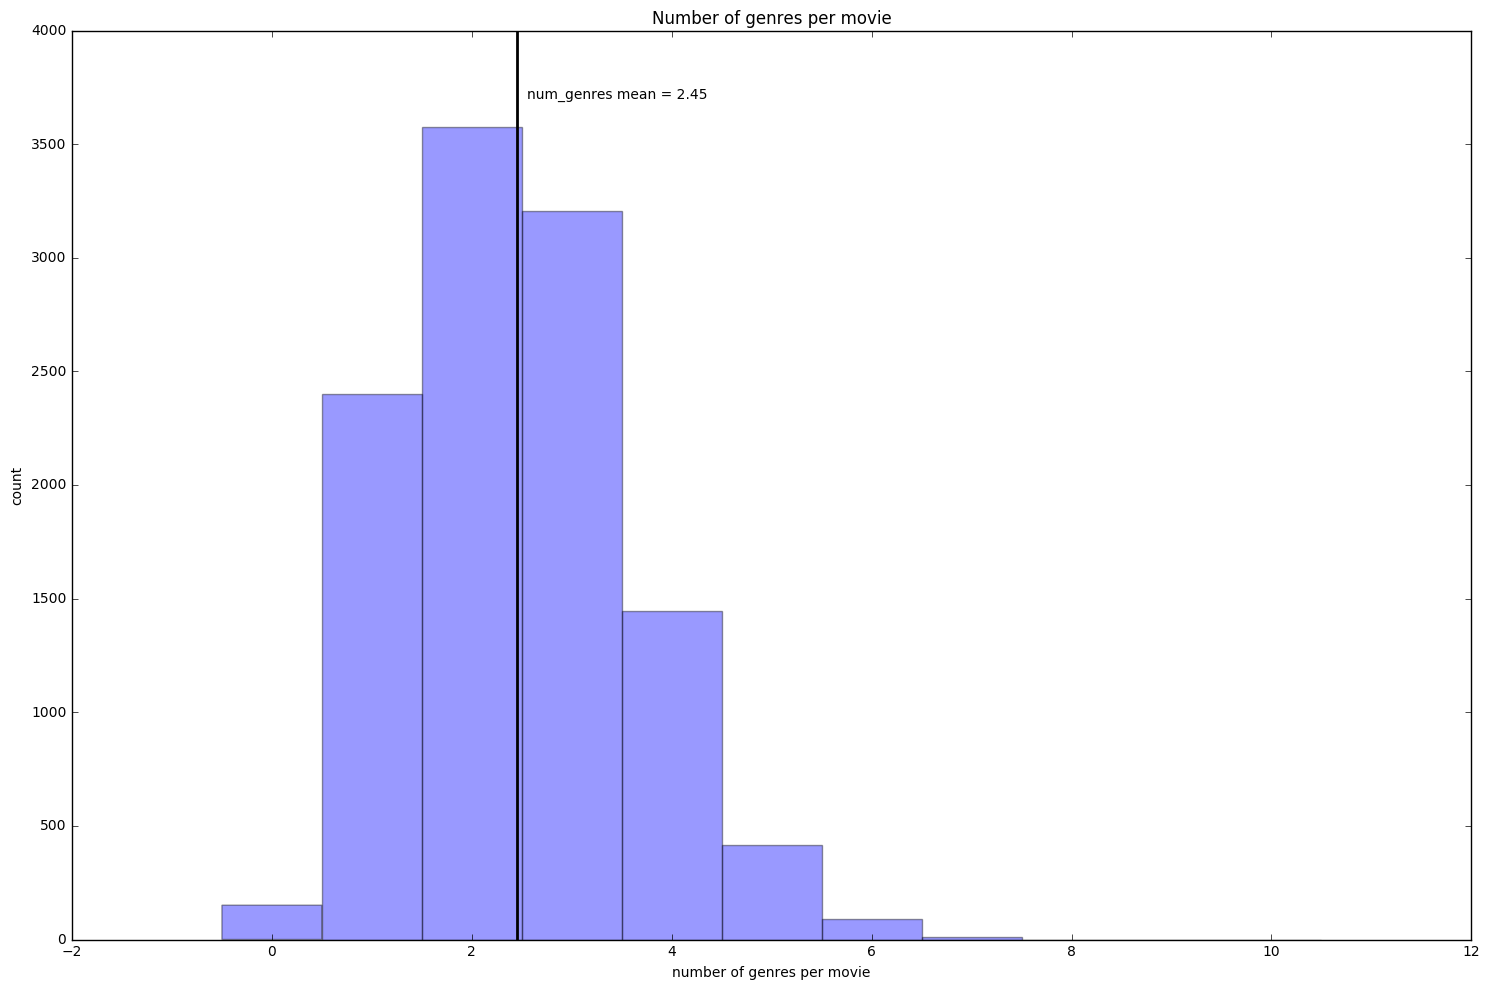

In [9]:
import ast
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import sys


TMDB_MOVIES_COLUMN_NAMES = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
]


def load_tmdb_movies():
    df = pd.read_csv('tmdb_movies_11291.csv', header=None, names=TMDB_MOVIES_COLUMN_NAMES, encoding="utf-8")
    for column_name in ['genres', 'spoken_languages']:
        df[column_name] = df[column_name].map(lambda d: ast.literal_eval(d))
    return df


def get_fig_size(nrows=1):
    return 15, 10 * nrows


def explore_num_genres_per_movie(tmdb_movies_df):
    print 'total number of movies: %d' % len(tmdb_movies_df)

    genres_rows = tmdb_movies_df['genres']

    num_genres_per_movie_list = []
    for genres in genres_rows:
        num_genres = len(genres)
        num_genres_per_movie_list.append(num_genres)

    unique_num_genres_per_movie = set(num_genres_per_movie_list)
    print 'unique values of number of genres per movie: %s' % unique_num_genres_per_movie

    num_genres_mean = np.mean(num_genres_per_movie_list)
    print 'mean number of genres per movie: %.3f' % num_genres_mean

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())
    ax.hist(num_genres_per_movie_list, bins=np.arange(-0.5, 11.0, step=1.0), alpha=0.4)
    ax.axvline(x=num_genres_mean, linewidth=2, color='k')
    plt.text(num_genres_mean + 0.1, 3700, 'num_genres mean = %.2f' % num_genres_mean)
    ax.set_xlabel('number of genres per movie')
    ax.set_ylabel('count')
    ax.set_title('Number of genres per movie')

    plt.tight_layout()
    plt.show()


tmdb_movies_df = load_tmdb_movies()
explore_num_genres_per_movie(tmdb_movies_df)

Our dataset contains top 11,291 TMDb movies by popularity.

We can notice that some movies have zero genres. The mean number of genres per movie is 2.45.
The maximum number of genres for one movie is 7.

#### Let's explore genre counts.

In [11]:
def explore_genre_counts(tmdb_movies_df):
    num_movies = len(tmdb_movies_df)

    genres_rows = tmdb_movies_df['genres']
    genre_list = []
    for genres in genres_rows:
        for genre in genres:
            genre_list.append(genre['name'])

    unique_genres = set(genre_list)
    print 'number of unique genres: %d' % len(unique_genres)

    counter = Counter(genre_list)
    counter_dict = {k: float(v) / num_movies for k, v in dict(counter).items()}

    sorted_counter_items = sorted(counter_dict.items(), key=operator.itemgetter(1), reverse=True)
    for k in sorted_counter_items:
        print '%s: %.1f%%' % (k[0], k[1] * 100.0)

        
explore_genre_counts(tmdb_movies_df)

number of unique genres: 20
Drama: 46.5%
Comedy: 31.7%
Thriller: 25.9%
Action: 23.9%
Romance: 16.8%
Adventure: 14.8%
Crime: 13.1%
Horror: 12.1%
Science Fiction: 10.9%
Family: 10.0%
Fantasy: 9.0%
Animation: 8.0%
Mystery: 7.2%
History: 3.9%
War: 3.1%
Music: 2.7%
Western: 2.0%
Documentary: 1.7%
TV Movie: 1.1%
Foreign: 0.5%


There are 20 unique genres. The most popular is Drama. 46.5% of the movies had Drama as one its genres.
The least popular is Foreign (0.5%).

#### Now we'll look at genre pairs.

In [3]:
from IPython.display import display


def explore_genre_pairs(tmdb_movies_df):
    genres_rows = tmdb_movies_df['genres']
    pair_list = []
    genre_list = []
    for genres in genres_rows:
        for genre in genres:
            genre_list.append(genre['name'])
        for i1 in xrange(len(genres) - 1):
            g1 = genres[i1]['name']
            for i2 in xrange(i1 + 1, len(genres)):
                g2 = genres[i2]['name']
                k1 = g1 + ':' + g2
                k2 = g2 + ':' + g1
                pair_list.append(k1)
                pair_list.append(k2)

    genre_counter = Counter(genre_list)

    sorted_counter_items = sorted(genre_counter.items(), key=operator.itemgetter(1), reverse=True)
    sorted_genres = [i[0] for i in sorted_counter_items]

    pair_counter = Counter(pair_list)

    print len(pair_list)
    print pair_counter.most_common(10)
    print pair_counter.most_common()[-10:-1]
    print len(pair_counter)

    num_genres = len(sorted_genres)
    pair_matrix = np.full((num_genres, num_genres), -1, dtype=np.int)

    for i in xrange(len(sorted_genres)):
        g1 = sorted_genres[i]
        for j in xrange(i + 1, len(sorted_genres)):
            g2 = sorted_genres[j]
            count = pair_counter[g1 + ":" + g2]
            pair_matrix[i, j] = count
            pair_matrix[j, i] = count

    pair_df = pd.DataFrame(pair_matrix, columns=sorted_genres, index=sorted_genres)

    display(pair_df)

    
explore_genre_pairs(tmdb_movies_df)

55162
[(u'Thriller:Drama', 1316), (u'Drama:Thriller', 1316), (u'Drama:Romance', 1277), (u'Romance:Drama', 1277), (u'Comedy:Drama', 1145), (u'Drama:Comedy', 1145), (u'Thriller:Action', 1135), (u'Action:Thriller', 1135), (u'Adventure:Action', 929), (u'Action:Adventure', 929)]
[(u'Thriller:Documentary', 1), (u'Science Fiction:History', 1), (u'Family:War', 1), (u'Documentary:Mystery', 1), (u'Science Fiction:Documentary', 1), (u'Foreign:Mystery', 1), (u'TV Movie:Western', 1), (u'Mystery:Foreign', 1), (u'Documentary:Thriller', 1)]
366


,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Horror,Science Fiction,Family,Fantasy,Animation,Mystery,History,War,Music,Western,Documentary,TV Movie,Foreign
Drama,-1,1145,1316,839,1277,434,854,263,253,221,260,94,411,377,278,161,93,15,42,29
Comedy,1145,-1,231,590,908,467,331,184,239,553,332,294,77,19,31,132,39,10,31,10
Thriller,1316,231,-1,1135,150,340,887,717,417,15,137,25,548,47,59,11,24,1,20,14
Action,839,590,1135,-1,144,929,617,207,619,142,308,193,126,123,129,18,101,5,19,22
Romance,1277,908,150,144,-1,142,89,31,78,105,148,43,60,63,52,95,29,0,18,8
Adventure,434,467,340,929,142,-1,111,58,390,453,420,315,58,75,57,17,58,4,21,4
Crime,854,331,887,617,89,111,-1,79,43,18,24,15,246,15,7,16,14,3,3,2
Horror,263,184,717,207,31,58,79,-1,268,2,120,18,206,6,7,8,9,4,10,6
Science Fiction,253,239,417,619,78,390,43,268,-1,128,257,143,85,1,5,8,5,1,15,7
Family,221,553,15,142,105,453,18,2,128,-1,335,541,19,3,1,56,4,6,35,3


Thriller and Drama is the most popular combination (1316 occurrences).
Some combinations happen only once (e.g. Thriller and Documentary).
Some combinations of genres never occurred. There are 366 out of possible 400 pairs.

When we look at this matrix of genre pairs, we can see that certain genre pairs are more likely to happen. 
For example, Thriller and Crime, Family and Adventure. 

In [10]:
genres = [genre['name'] for genres in tmdb_movies_df['genres'] for genre in genres]
print(len(genres), len(tmdb_movies_df))
np.unique(genres)

(27633, 11291)


array([u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'History', u'Horror', u'Music', u'Mystery', u'Romance',
       u'Science Fiction', u'TV Movie', u'Thriller', u'War', u'Western'], 
      dtype='<U15')

### Additional visualization sketches and EDA with a focus on movie genres

#### PCA and genres

In [89]:
#keenan's code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import ast
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
from operator import itemgetter

In [90]:
movie_df112 = pd.read_csv('Milestone_1/tmdb_movies_11291.csv', names = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
])

In [91]:
def genre_clean(df):
    genres = []
    all_genre = []
    for row in df['genres'].tolist():
        cur_row = []
        for entry in ast.literal_eval(row):
            cur_row.append(str(entry[u'name']))
            all_genre.append(str(entry[u'name']))
        genres.append(' '.join(cur_row))
    return (genres, list(set(all_genre)))
movie_df112['genre_vals'] = genre_clean(movie_df112)[0]

In [92]:
def pca_and_naclean_temp(df):
    sub = df.dropna()
    X = pd.DataFrame(sub, columns=['budget', 'popularity', 'revenue', 'runtime', 'vote_average'])
    pca = PCA(n_components=3)
    X_r = pca.fit(X).transform(X)
    sub.loc[sub.budget > -5, 'pc1'] = X_r[:,0]
    sub.loc[sub.budget > -5, 'pc2'] = X_r[:,1]
    sub.loc[sub.budget > -5, 'pc3'] = X_r[:,2]
    return sub

In [93]:
clean_mov112 = pca_and_naclean_temp(movie_df112)

In [94]:
def plot_pca_3(a_g, df, ds = ''):
    fig = plt.figure(figsize=(30, 12))
    ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
    #for the sake of simplicty, I counted any movie with genre x as having genre x, so the same movie may pop up in the same spot with a different genre
    for g in a_g:
        ax1.scatter(df[df['genre_vals'].str.contains(g)]['pc1'], df[df['genre_vals'].str.contains(g)]['pc2'],df[df['genre_vals'].str.contains(g)]['pc3'], c=np.random.rand(3,1), label=('Genre: '+str(g)))
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')
    ax1.set_zlabel('Component 3')
    ax1.set_title('Data projected onto the first 3 PCA components'+ds)
    ax1.legend()
    plt.show()

def plot_pca_2(a_g, df, ds = ''):
    fig = plt.figure(figsize=(30, 12))
    ax1 = fig.add_subplot(1, 2, 1)
    #for the sake of simplicty, I counted any movie with genre x as having genre x, so the same movie may pop up in the same spot with a different genre
    for g in a_g:
        ax1.scatter(df[df['genre_vals'].str.contains(g)]['pc1'], df[df['genre_vals'].str.contains(g)]['pc2'], c=np.random.rand(3,1), label=('Genre: '+str(g)))
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')
    ax1.set_title('Data projected onto the first 2 PCA components'+ds)
    ax1.legend()
    plt.show()

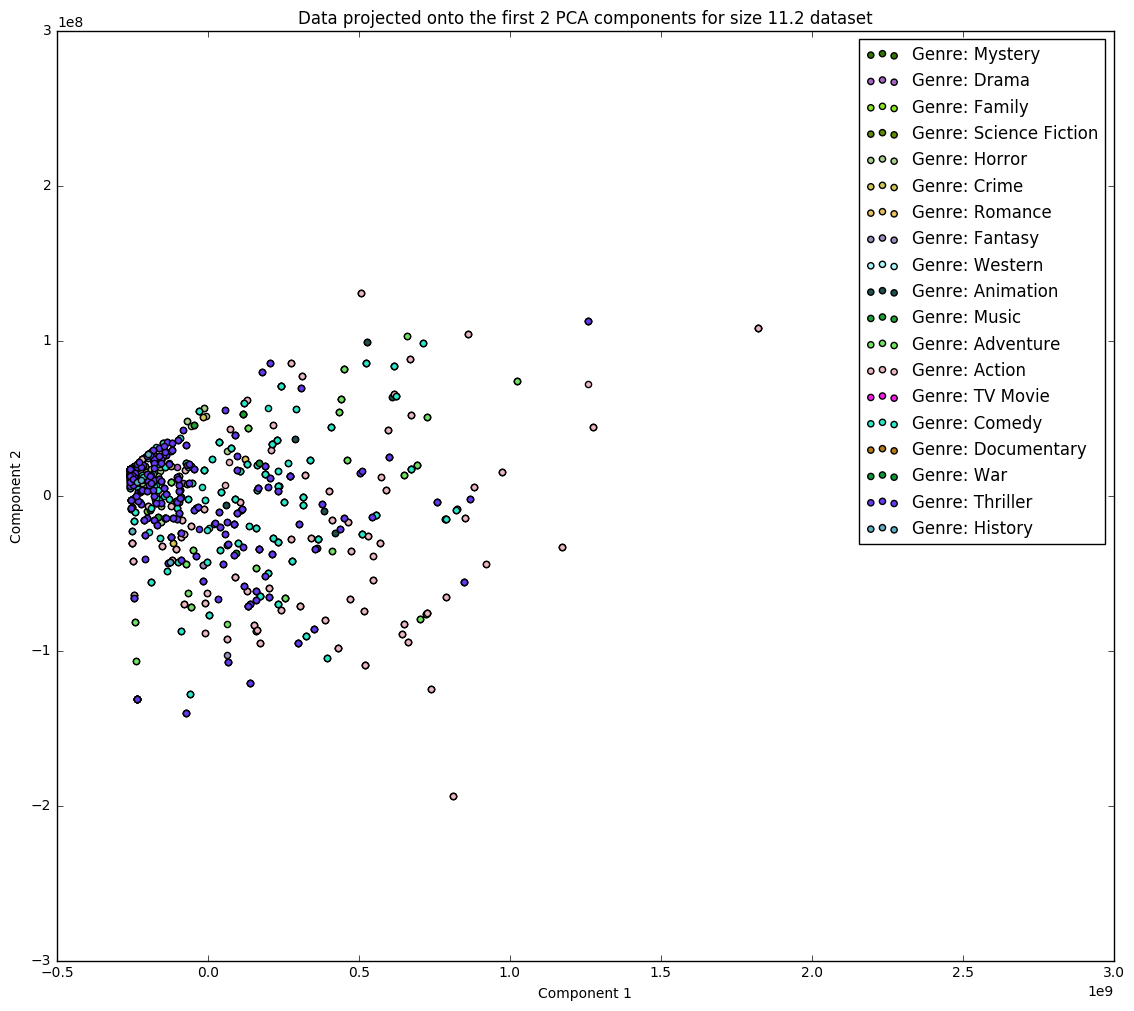

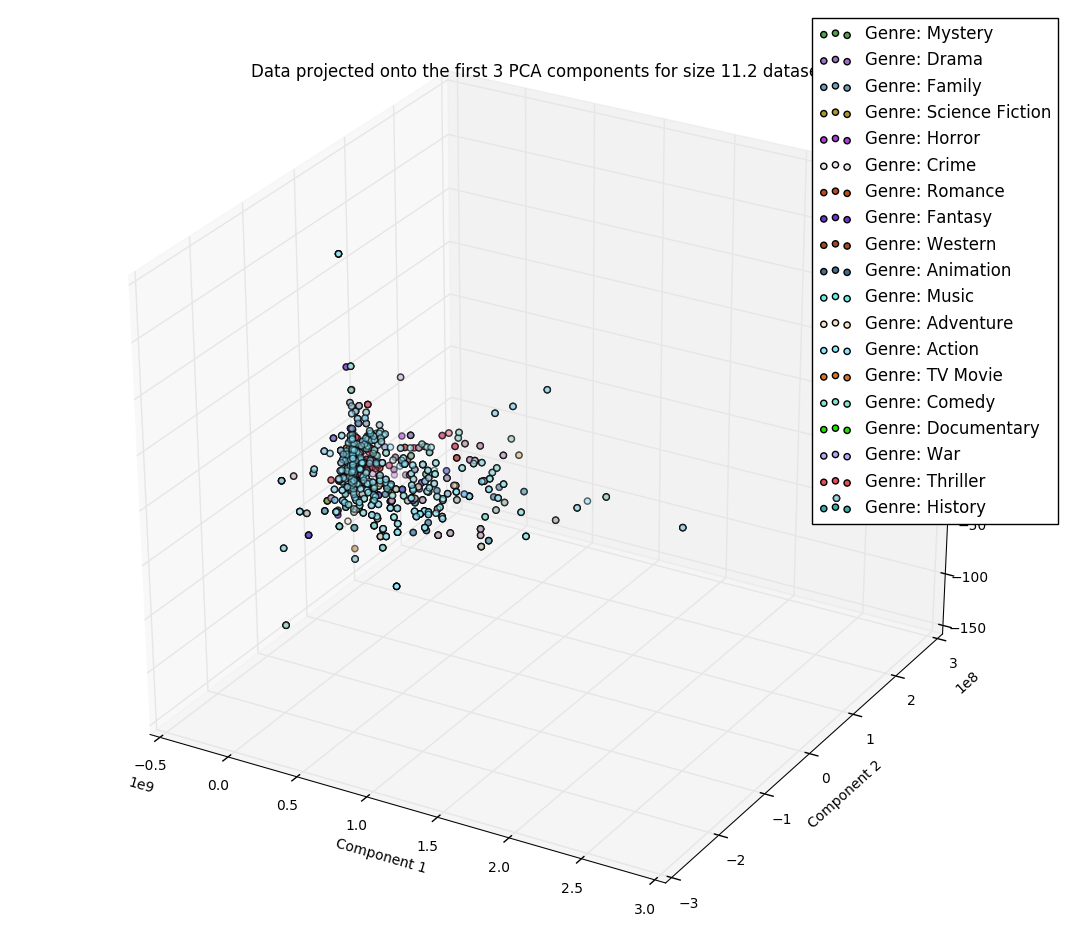

In [95]:
plot_pca_2(genre_meta[1], clean_mov112, ds = ' for size 11.2 dataset')
plot_pca_3(genre_meta[1], clean_mov112, ds = ' for size 11.2 dataset')

In [96]:
def create_dic_and_plot(df, every_genre, ds = ''):
    freq_dic = {}
    for genre in every_genre:
        temp = float(len(df[df['genre_vals'].str.contains(genre)]))/float(len(df))
        key = genre + ':(' + str(round(temp, 4)*100) + '%)'
        freq_dic[key] = temp
    new = OrderedDict(sorted(freq_dic.items(), key=itemgetter(1)))
    
    plt.bar(range(len(new)), new.values(), align='center', color= 'blue')
    plt.xticks(range(len(new)), new.keys(), rotation=90)
    plt.ylabel('Frequencies')
    plt.xlabel('Genres')
    plt.title('Percentiles of Movies within Each Genre (For all genres within a movie)'+ds)
    plt.show()

#### Bar plots for genres

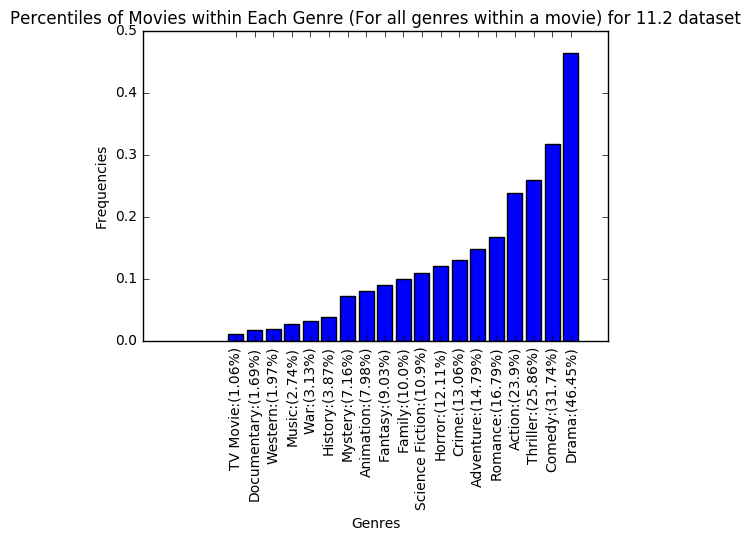

In [97]:
create_dic_and_plot(movie_df112, genre_meta[1], ' for 11.2 dataset')

#### Influential positive and negative terms for different genres

In [37]:
import ast
import operator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
import nltk.data
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Timur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Prints most influential positive and negative terms from the movies overview. Later we could extend this to analyse movies scripts.

In [38]:
TMDB_MOVIES_COLUMN_NAMES = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
]

def load_tmdb_movies():
    df = pd.read_csv('Milestone_1/tmdb_movies_11291.csv', header=None, names=TMDB_MOVIES_COLUMN_NAMES)
    for column_name in ['genres', 'spoken_languages']:
        df[column_name] = df[column_name].map(lambda d: ast.literal_eval(d))
    return df

In [39]:
def getY(df, genre_name):
    def hasGenre(genres, genre_name):
        for genre in genres:
            if(genre['name'] == genre_name):
                return 1.0
        return 0.0
    return np.array([hasGenre(genre_list, genre_name) for genre_list in df['genres']])

def cross_validate(x, y, folds, reg_params):
    kf = KFold(x.shape[0], n_folds=folds)
    cv_score = np.zeros(reg_params.size)
    for i, c in enumerate(reg_params):
        reg = LogReg(penalty='l1', C = c)
        score_sum = 0.0
        for train_index, test_index in kf:
            reg.fit(x[train_index], y[train_index])
            score_sum += reg.score(x[test_index], y[test_index])
        cv_score[i] = score_sum/float(folds)
    return cv_score

In [40]:
def getInfluentialTerms(x, genre_name):
    # get labels
    y = getY(tmdb_movies_with_overview, genre_name)
    # cross-validate for best regularization parameter
    all_c = np.power(10., range(-7, 8))
    cv_scores = cross_validate(x, y, 10, all_c)
    best_c = all_c[np.argmax(cv_scores)]
    # fit logistic regression
    logReg = LogReg(penalty='l1', C = best_c)
    logReg.fit(x, y)
    coef = logReg.coef_[0]
    # top and bottom percentiles
    top_1 = [coef >= np.percentile(coef, 99)]
    bottom_1 = [coef <= np.percentile(coef, 1)]
    return top_1, bottom_1

In [41]:
tmdb_movies_df = load_tmdb_movies()
has_overview = ~tmdb_movies_df['overview'].isnull()
tmdb_movies_with_overview = tmdb_movies_df[has_overview]

In [42]:
vectorizer = CountVectorizer( 
    stop_words = stopwords.words("english"), 
    token_pattern = '[a-zA-Z]+[0-9]*',
    max_df = 0.9, 
    min_df = 5, 
    dtype=np.float32 )
x = vectorizer.fit_transform(tmdb_movies_with_overview['overview'].values).toarray()
print 'predictor matrix shape:', x.shape

predictor matrix shape: (11145L, 8773L)


In [43]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array([u'aaron', u'abandon', u'abandoned', ..., u'zone', u'zoo', u'zooey'], 
      dtype='<U17')

In [44]:
def printInfluentialTerms(genre_name):
    top_1, bottom_1 = getInfluentialTerms(x, genre_name)
    print genre_name, 'most influential positive terms:', feature_names[top_1]
    print genre_name, 'most influential negative terms:', feature_names[bottom_1]

In [45]:
printInfluentialTerms('Drama')

Drama most influential positive terms: [u'afterlife' u'aged' u'alcoholic' u'allied' u'anger' u'assistance'
 u'astronaut' u'ballet' u'banned' u'betrothed' u'blizzard' u'boxer'
 u'brien' u'build' u'capsule' u'chronicle' u'colonies' u'connections'
 u'constant' u'crushed' u'cycle' u'depression' u'detention' u'difficult'
 u'disturbed' u'drama' u'dramatic' u'elaborate' u'emotionally' u'enigmatic'
 u'erin' u'finest' u'forty' u'grief' u'guns' u'halt' u'hardened' u'heat'
 u'holly' u'holocaust' u'idealistic' u'incriminating' u'industrial'
 u'interpretation' u'islamic' u'janitor' u'josh' u'laden' u'laundry'
 u'loan' u'loveless' u'luis' u'luna' u'maid' u'miracle' u'morgan' u'mute'
 u'orphans' u'painter' u'patrick' u'performs' u'physician' u'poet'
 u'primary' u'prosecutor' u'pursue' u'raped' u'rehab' u'repercussions'
 u'roads' u'ruth' u'sail' u'shoes' u'skill' u'smitten' u'spying'
 u'stockholm' u'tempted' u'tennessee' u'therapist' u'tragedy' u'trevor'
 u'trucker' u'unorthodox' u'vast' u'vision' u'w

In [46]:
printInfluentialTerms('Comedy')

Comedy most influential positive terms: [u'abandonment' u'allan' u'annoying' u'applies' u'archie' u'asterix'
 u'attitudes' u'awkward' u'axe' u'brainy' u'bumbling' u'bunch' u'celebrity'
 u'cheap' u'cheerleader' u'chocolate' u'citizen' u'clinic' u'clouseau'
 u'clueless' u'comedic' u'comedy' u'comfortable' u'comic' u'confusion'
 u'cruchot' u'curmudgeonly' u'dating' u'examine' u'fake' u'fist'
 u'fraternity' u'furious' u'gary' u'grandpa' u'hapless' u'hilariously'
 u'horny' u'humor' u'hypochondriac' u'inadvertently' u'incompetent'
 u'intergalactic' u'inventor' u'irreverent' u'jokes' u'laced' u'leopold'
 u'lifeguard' u'lotus' u'mascot' u'mistakenly' u'mundane' u'nephew'
 u'patriarch' u'photos' u'positions' u'pretends' u'quirky' u'regina'
 u'relocated' u'reported' u'resolve' u'resourceful' u'retrieving' u'roy'
 u'sentenced' u'shallow' u'shrek' u'sixth' u'spend' u'spoof' u'stable'
 u'stripper' u'sure' u'surprisingly' u'swimming' u'tech' u'temporarily'
 u'thus' u'underway' u'unfortunate' u'uptig

In [47]:
printInfluentialTerms('Thriller')

Thriller most influential positive terms: [u'accident' u'agent' u'alive' u'apartment' u'assassin' u'begins' u'bond'
 u'car' u'cia' u'computer' u'conspiracy' u'cop' u'crime' u'criminal'
 u'criminals' u'dangerous' u'dark' u'dead' u'deadly' u'death' u'deep'
 u'detective' u'discover' u'discovers' u'drug' u'escape' u'events' u'ex'
 u'fear' u'former' u'goes' u'group' u'horror' u'hospital' u'hostage'
 u'house' u'identity' u'job' u'john' u'kidnapped' u'kill' u'killer'
 u'killers' u'killing' u'mark' u'may' u'mind' u'mission' u'mob' u'murder'
 u'murdered' u'murders' u'mysterious' u'mystery' u'nuclear' u'officer'
 u'past' u'phone' u'police' u'prey' u'psychiatrist' u'rachel' u'remote'
 u'revenge' u'run' u'sam' u'secret' u'security' u'seemingly' u'seems'
 u'serial' u'sinister' u'soldier' u'something' u'soon' u'supernatural'
 u'survival' u'taken' u'target' u'terror' u'terrorist' u'thriller'
 u'trapped' u'u' u'uncover' u'underworld' u'unknown' u'violent']
Thriller most influential negative terms: [u'

In [48]:
printInfluentialTerms('Action')

Action most influential positive terms: [u'advice' u'airborne' u'apes' u'archaeologist' u'assassin' u'assassins'
 u'audition' u'avenger' u'batman' u'benevolent' u'bud' u'bumbling' u'cache'
 u'caine' u'captors' u'celebrities' u'civilization' u'clayton' u'clone'
 u'commando' u'corporation' u'criminals' u'detailing' u'directly' u'donor'
 u'emerge' u'enforcement' u'enterprise' u'exceptional' u'exiled' u'fail'
 u'fearsome' u'fighters' u'firefighter' u'flynn' u'hacker' u'hawk'
 u'hitman' u'internal' u'islands' u'items' u'jai' u'kgb' u'knife'
 u'loyalty' u'luc' u'manuscript' u'martial' u'millennium' u'missile'
 u'musketeers' u'nevada' u'newest' u'ninjas' u'operatives' u'parker'
 u'paths' u'patrol' u'province' u'robots' u'ruined' u'ruthless' u'safety'
 u'samurai' u'savage' u'scarce' u'sinbad' u'skilled' u'slaves' u'smuggling'
 u'sniper' u'speed' u'strategy' u'struck' u'superhero' u'superman'
 u'superpowers' u'swiftly' u'target' u'terrorists' u'transport' u'trucker'
 u'uss' u'viciously' u'vigil

#### Budget and revenue for genres

In [56]:
tmdb_movies_df['release_date']  = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df['year'] = tmdb_movies_df['release_date'].map(lambda x: x.year)

In [57]:
def financeByGenre(df, genre_name):
    def hasGenre(genres, genre_name):
        for genre in genres:
            if(genre['name'] == genre_name):
                return True
        return False
    d = df[[hasGenre(genre_list, genre_name) for genre_list in df['genres']]]
    return d.groupby(['year'])[["budget", "revenue"]].sum()

In [58]:
def plotFincnceByGenre(df, genre_name):
    d = financeByGenre(df, genre_name)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(d.index, d['budget'], c='r', label = 'Budget')
    ax.plot(d.index, d['revenue'], c='g', label = 'Revenue')
    ax.set_xlabel('Years')
    ax.set_ylabel('Score')
    ax.set_title(genre_name  + ' budget vs revenue')
    ax.legend(loc = 'best')
    plt.ticklabel_format(useOffset=False)    

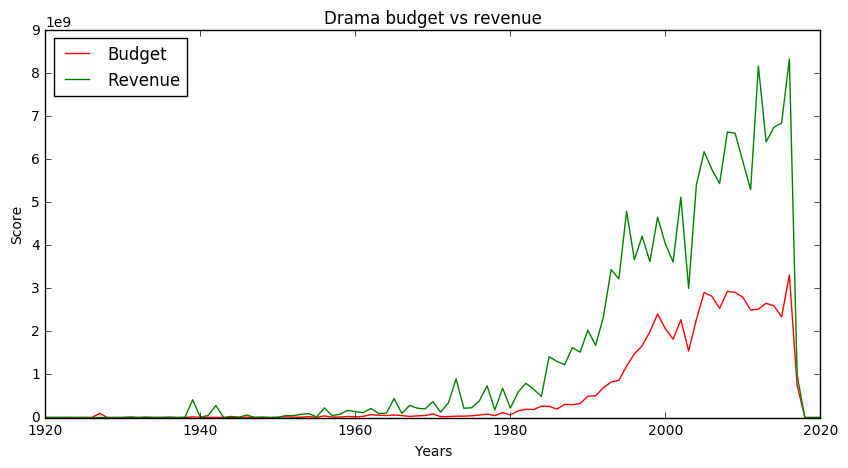

In [59]:
plotFincnceByGenre(tmdb_movies_df, 'Drama')

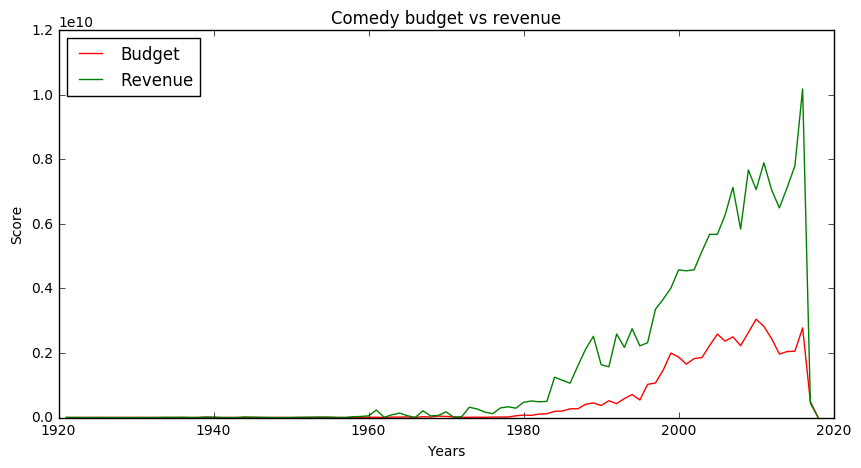

In [60]:
plotFincnceByGenre(tmdb_movies_df, 'Comedy')

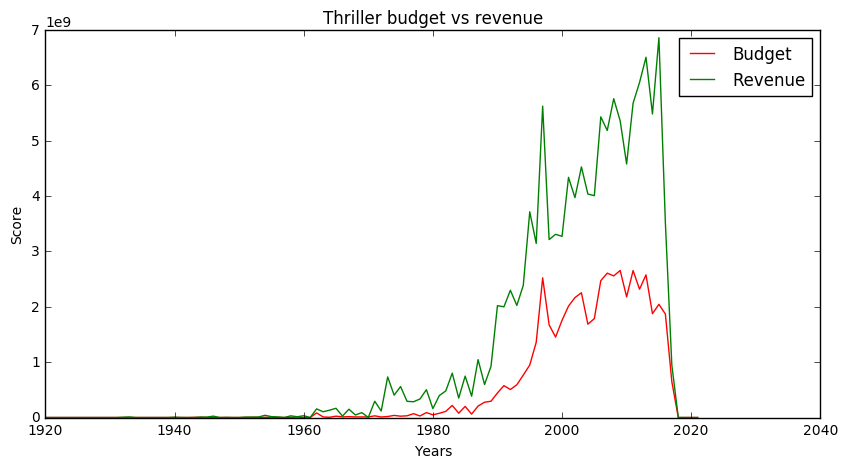

In [61]:
plotFincnceByGenre(tmdb_movies_df, 'Thriller')

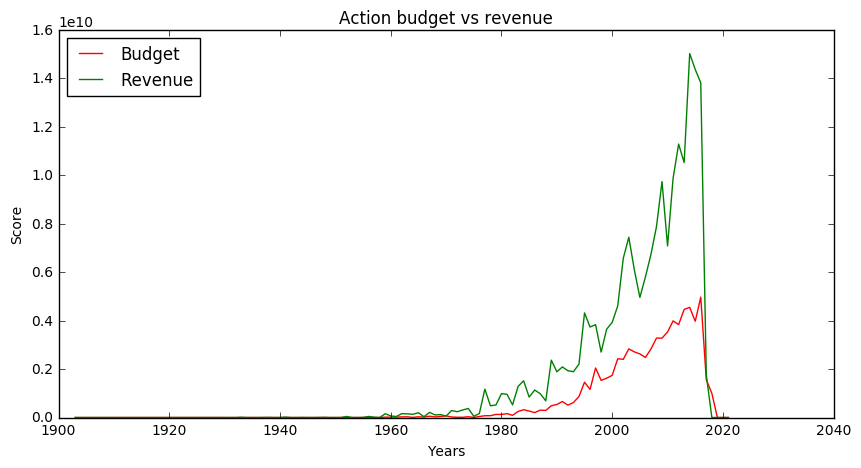

In [62]:
plotFincnceByGenre(tmdb_movies_df, 'Action')

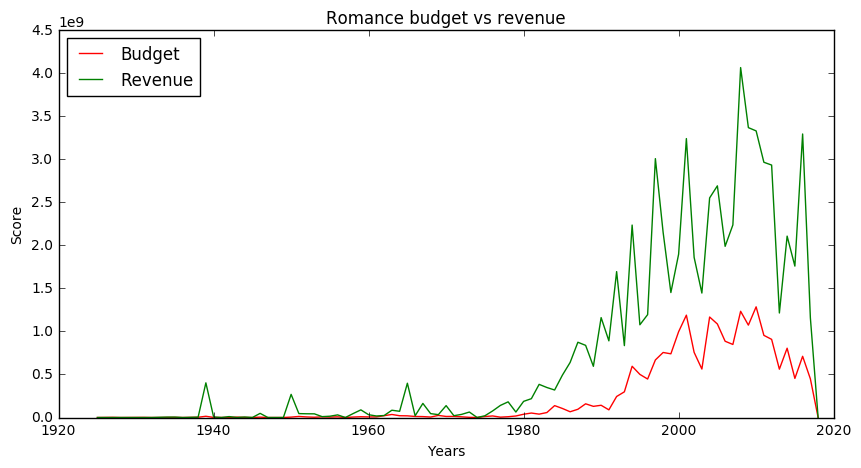

In [63]:
plotFincnceByGenre(tmdb_movies_df, 'Romance')

In [64]:
genre_names = ['Drama', 'Comedy', 'Crime', 'Action', 'Fantasy', 'Western', 'Science Fiction', 'Family']

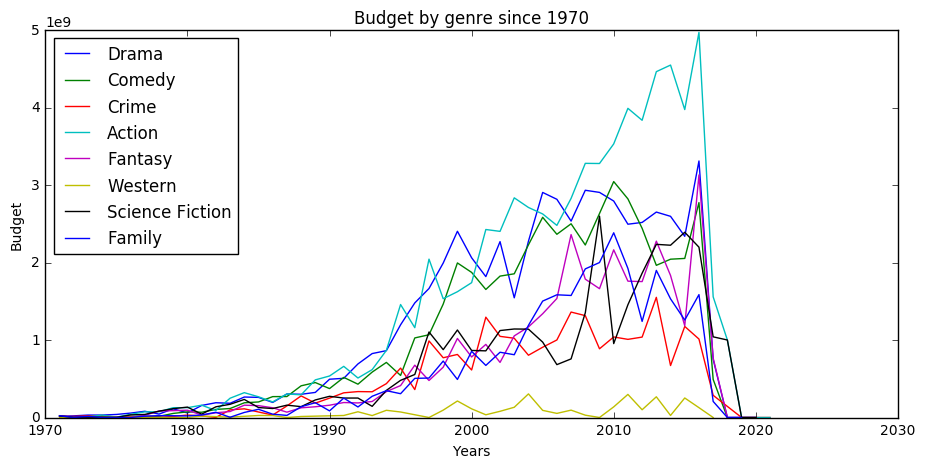

In [66]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)

for genre_name in genre_names:
    d = financeByGenre(tmdb_movies_df[tmdb_movies_df['year'] > 1970], genre_name)
    ax.plot(d.index, d['budget'], label = genre_name)
    ax.legend(loc = 'best')
    
ax.set_xlabel('Years')
ax.set_ylabel('Budget')    
ax.set_title('Budget by genre since 1970')

#### Multi-label model

In [72]:
import ast
import operator
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import nltk.data
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Timur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

One approach to handle multiple genres per movie is to use OneVsRestClassifier.

Load movies and prepare the training set by filtering out movies without genres or without reviews

In [67]:
has_overview = ~tmdb_movies_df['overview'].isnull()
has_genre = ~tmdb_movies_df['genres'].apply(lambda x: not x )
tmdb_movies_with_overview = tmdb_movies_df[has_overview & has_genre]

Convert the overviews to a matrix of token counts

In [68]:
vectorizer = CountVectorizer( 
    stop_words = stopwords.words("english"), 
    token_pattern = '[a-zA-Z]+[0-9]*',
    max_df = 0.9, 
    min_df = 5, 
    dtype=np.float32 )
X = vectorizer.fit_transform(tmdb_movies_with_overview['overview'].values).toarray()
print 'predictor matrix shape:', X.shape

predictor matrix shape: (11022L, 8707L)


In [69]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array([u'aaron', u'abandon', u'abandoned', ..., u'zone', u'zoo', u'zooey'], 
      dtype='<U17')

Prepare labels for each movie

In [73]:
labels = tmdb_movies_with_overview['genres'].apply(lambda x: [g['name'] for g in x])
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)
print 'label matrix shape:', y.shape

label matrix shape: (11022L, 20L)


In [74]:
mlb.classes_

array([u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'History', u'Horror', u'Music', u'Mystery', u'Romance',
       u'Science Fiction', u'TV Movie', u'Thriller', u'War', u'Western'], dtype=object)

Fit the classifier

In [75]:
oneVsResClassifier = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y)

In [76]:
predict = oneVsResClassifier.predict(X)

In [77]:
print 'First observation actual label', y[1]

First observation actual label [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [78]:
print 'First observation predicted label: ', y[1]

First observation predicted label:  [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [79]:
print 'Accuracy on the training set: ', oneVsResClassifier.score(X, y)

Accuracy on the training set:  0.992741789149


### A list of questions you could answer with this and related data. Get creative here!